<a href="https://www.kaggle.com/code/xenowing/image-classification-using-cnn?scriptVersionId=185421548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-06-25 17:16:07.785072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 17:16:07.785174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 17:16:07.934054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Load and Preprocess the data

In [3]:
#Define paths
train_dir='/kaggle/input/dogs-cats-dataset/train'
test_dir='/kaggle/input/dogs-cats-dataset/test1'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Create a image datagen
train_datagen=ImageDataGenerator(
rescale=1/255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.2)

test_datagen=ImageDataGenerator(rescale=1/255)

#Load train and validation data
train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary',
subset='training') #Set as training data

validation_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary',
subset='validation')

#Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 1 classes.


### Create and Train a CNN model

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Display model summary to verify architecture
cnn_model.summary()

# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-25 17:16:31.990809: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31758: 7.18885, expected 6.34915
2024-06-25 17:16:31.990862: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31794: 6.79032, expected 5.95062
2024-06-25 17:16:31.990871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31795: 6.91364, expected 6.07395
2024-06-25 17:16:31.990879: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31796: 7.21123, expected 6.37153
2024-06-25 17:16:31.990887: E external/local_xla/xla/service/gpu/buffer_

  1/150 ━━━━━━━━━━━━━━━━━━━━ 23:55 10s/step - accuracy: 0.5938 - loss: 0.6671

I0000 00:00:1719335795.925129     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 348ms/step - accuracy: 0.5352 - loss: 0.8193 - val_accuracy: 0.5684 - val_loss: 0.6803
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-25 17:17:28.147520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20279: 3.63212, expected 3.13652
2024-06-25 17:17:28.147615: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30190: 3.63212, expected 3.13652
2024-06-25 17:17:28.147632: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31831: 5.49767, expected 4.81794
2024-06-25 17:17:28.147640: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31929: 5.27093, expected 4.5912
2024-06-25 17:17:28.147648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31931: 5.73549, ex

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7106
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.5772 - loss: 0.6817 - val_accuracy: 0.6157 - val_loss: 0.6579
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.6189
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 194ms/step - accuracy: 0.6050 - loss: 0.6646 - val_accuracy: 0.6343 - val_loss: 0.6392
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5181
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.6263 - loss: 0.6442 - val_accuracy: 0.6571 - val_loss: 0.6214
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.5380
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 195ms/step - accuracy: 0

In [6]:
#Evaluate the model
val_loss,val_accuracy=cnn_model.evaluate(validation_generator,
                                        steps=validation_generator.samples//validation_generator.batch_size)
print(f"Validation Accuracy:{val_accuracy*100:.2f}")
print(f"Validation Loss:{val_loss:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.6518 - loss: 0.6278
Validation Accuracy:65.88
Validation Loss:0.6114


In [7]:
#Calcualte the train accuracy and loss
train_generator.reset()
train_loss,train_accuracy=cnn_model.evaluate(train_generator,verbose=1)
print(f"Training Accuracy:{train_accuracy*100:.2f}")
print(f"Training Loss:{train_loss:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.6680 - loss: 0.6010
Training Accuracy:67.52
Training Loss:0.5981


2024-06-25 17:20:04.501546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4610: 3.93875, expected 3.42964
2024-06-25 17:20:04.501639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14521: 3.93875, expected 3.42964
2024-06-25 17:20:04.501654: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15882: 6.56496, expected 5.80551
2024-06-25 17:20:04.501662: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15918: 5.95458, expected 5.19513
2024-06-25 17:20:04.501670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15919: 6.47927, expected 5.71982
2024-06-25 17:20:04.501678: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15927: 6.48245, expected 5.723
2024-06-25 17:20:04.501686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15928: 6.2255, expected 5.46605
2024-06-25 17:20:04.501693: E e

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


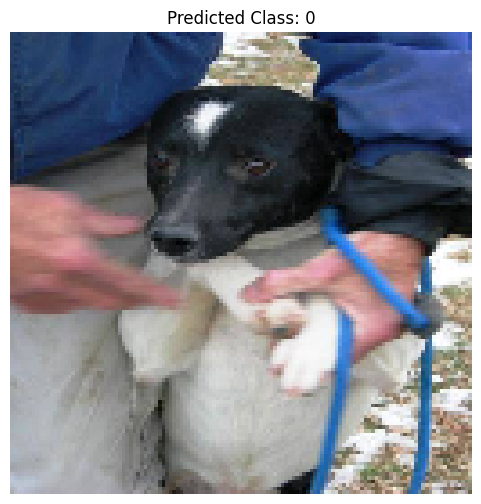

In [8]:
test_generator.reset()

try:
    # Get a batch of test images (batch size 1)
    test_batch = next(test_generator)

    if len(test_batch[0]) == 0:
        raise ValueError("Empty batch received from test_generator. Check generator configuration.")

    # Assuming batch size is 1, extract the first image
    test_image = test_batch[0][0]  # assuming image is the first element in the batch

    # Reshape the image for prediction (if needed)
    test_image = np.expand_dims(test_image, axis=0)

    # Predict labels for the test image
    y_pred = cnn_model.predict(test_image)
    predicted_class = np.argmax(y_pred, axis=1)[0]

    # Display the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(test_batch[0][0])
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

except StopIteration:
    print("No more batches available in the test generator.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except IndexError as ie:
    print(f"IndexError: {ie}. Check if the test generator is empty or misconfigured.")
except Exception as e:
    print(f"Error occurred: {e}")

### Performance Metrics 

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

#Function to get true labels and predictions'
def get_labels_and_predictions(generator,model):
    generator.reset()
    true_labels=[]
    predictions=[]
    for i in range(generator.samples//generator.batch_size):
        batch=next(generator)
        images,labels=batch[0],batch[1]
        preds=model.predict(images)
        preds=np.round(preds).flatten()
        true_labels.extend(labels)
        predictions.extend(preds)
    return np.array(true_labels),np.array(predictions)

#Gte true labels and predictions for training set 
train_true_labels,train_predictions=get_labels_and_predictions(train_generator,cnn_model)

#Get true labels and predictions for validation set
validation_true_labels,validation_predictions=get_labels_and_predictions(validation_generator,cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

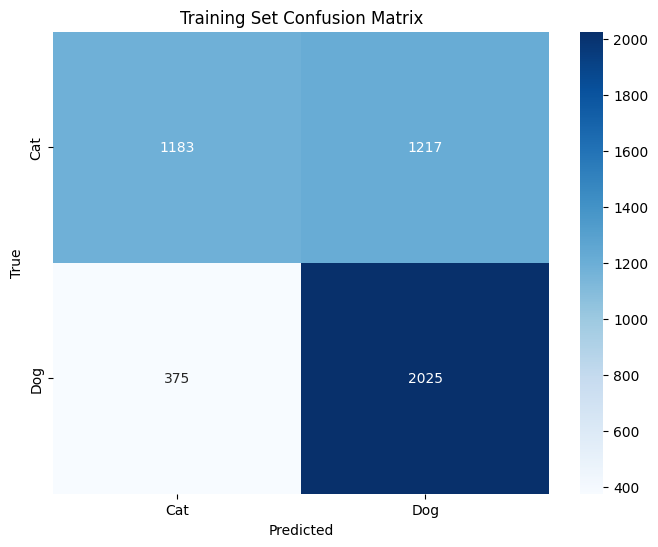

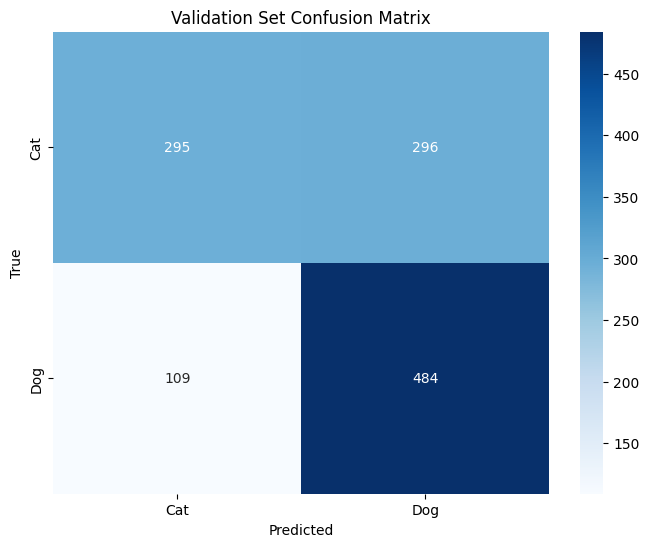

Training Set Classification Report
              precision    recall  f1-score   support

         Cat       0.76      0.49      0.60      2400
         Dog       0.62      0.84      0.72      2400

    accuracy                           0.67      4800
   macro avg       0.69      0.67      0.66      4800
weighted avg       0.69      0.67      0.66      4800

Validation Set Classification Report
              precision    recall  f1-score   support

         Cat       0.73      0.50      0.59       591
         Dog       0.62      0.82      0.71       593

    accuracy                           0.66      1184
   macro avg       0.68      0.66      0.65      1184
weighted avg       0.68      0.66      0.65      1184



In [11]:
# Function to get true labels and predictions
def get_labels_and_predictions(generator, model):
    generator.reset()  # Reset generator
    true_labels = []
    predictions = []
    
    for i in range(generator.samples // generator.batch_size):
        batch = next(generator)
        images, labels = batch[0], batch[1]
        preds = model.predict(images)
        preds = np.round(preds).flatten()  # Assuming binary classification and sigmoid activation
        true_labels.extend(labels)
        predictions.extend(preds)
    
    return np.array(true_labels), np.array(predictions)

# Get true labels and predictions for training set 
train_true_labels, train_predictions = get_labels_and_predictions(train_generator, cnn_model)

# Get true labels and predictions for validation set
validation_true_labels, validation_predictions = get_labels_and_predictions(validation_generator, cnn_model)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predictions, title):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for training set
plot_confusion_matrix(train_true_labels, train_predictions, 'Training Set Confusion Matrix')

# Plot confusion matrix for validation set
plot_confusion_matrix(validation_true_labels, validation_predictions, 'Validation Set Confusion Matrix')

# Print classification reports
print("Training Set Classification Report")
print(classification_report(train_true_labels, train_predictions, target_names=['Cat', 'Dog']))

print("Validation Set Classification Report")
print(classification_report(validation_true_labels, validation_predictions, target_names=['Cat', 'Dog']))
